# Notebook 1 — Parallaxe et Magnitude

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import pandas as pd

## 1) Définitions

In [2]:
def distance_from_parallax(p_arcsec):
    """Retourne la distance en parsecs"""
    return ... ## 1 / p_arcsec  # À tester avec p_arcsec > 0

In [6]:
def module_distance(d_pc):
    """Retourne le module de distance mu pour une distance d_pc."""
    return ... ## 5 * np.log10(d_pc) - 5

In [3]:
def absolute_magnitude(m, d_pc):
    """Retourne la magnitude absolue."""
    return ... ## m - 5 * np.log10(d_pc) + 5

In [7]:
def flux_received(L, d_pc):
    """Flux reçu en unités arbitraires si L en unités solaires."""
    AU_per_pc = 206265
    d_AU = ... ## d_pc * AU_per_pc
    return  ... ## L / (4 * np.pi * d_AU**2)

### Questions

- Que se passe-t-il si on néglige l’extinction interstellaire ?  
- Pourquoi la parallaxe est-elle difficile à mesurer pour des grandes distances ?


## 2) Exercices

### Cas 1

In [14]:
# Cas 1 : une étoile a une parallaxe de 0.05 arcsec, magnitude apparente 10
p = ... ## 0.05
m_apparent = ... ## 10

d = distance_from_parallax(p)
mu = module_distance(d)
M = absolute_magnitude(m_apparent, d)

print(f"Parallaxe : {p} arcsec")
print(f"Distance : {d:.1f} pc")
print(f"Module de distance : {mu:.2f}")
print(f"Magnitude absolue : {M:.2f}")

Parallaxe : 0.05 arcsec
Distance : 20.0 pc
Module de distance : 1.51
Magnitude absolue : 8.49


### Cas 2

In [15]:
## Cas 2 : comparer deux étoiles de même luminosité mais à des distances différentes

L_sun = 1

d1 = 10  # pc
d2 = 100  # pc

F1 = flux_received(L_sun, d1)
F2 = flux_received(L_sun, d2)

print(f"Flux à {d1} pc : {F1:.3e}")
print(f"Flux à {d2} pc : {F2:.3e}")

# Vérifier que F ∝ 1/d^2
print(f"F1/F2 = {F1/F2:.2f} (devrait être ~ (d2/d1)^2 = {(d2/d1)**2:.2f})")

Flux à 10 pc : 1.870e-14
Flux à 100 pc : 1.870e-16
F1/F2 = 100.00 (devrait être ~ (d2/d1)^2 = 100.00)


##  3) Visualisation

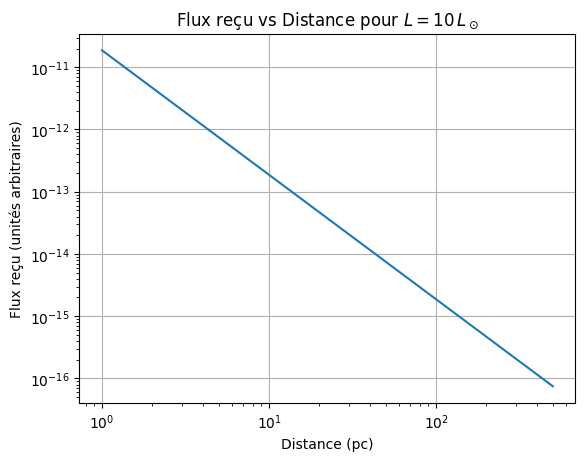

In [18]:
## 1) Courbe de fluc vs distance

L_star = 10
pc_range = np.linspace(1, 500, 500)
fluxes = flux_received(L_star, pc_range)

plt.figure()
plt.loglog(pc_range, fluxes)
plt.xlabel('Distance (pc)')
plt.ylabel('Flux reçu (unités arbitraires)')
plt.title(r'Flux reçu vs Distance pour $L = 10\, L_\odot$')
plt.grid(True)
plt.show()

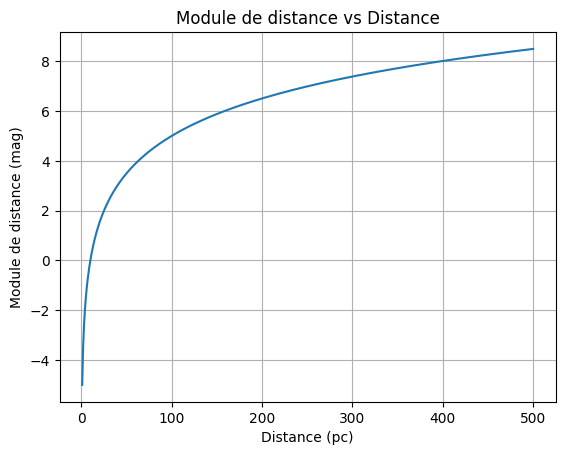

In [23]:
## 2) Courbe du module de distance en fonction de la distance

plt.figure()
plt.plot(pc_range, [module_distance(d) for d in pc_range])
plt.xlabel('Distance (pc)')
plt.ylabel('Module de distance (mag)')
plt.title('Module de distance vs Distance')
plt.grid(True)
plt.show()

In [ ]:
## 3) Courbe de magnitude apparente pour une étoile de magnitude absolue fixée

M_star = 0
m_apparent_list = M_star + np.array([module_distance(d) for d in pc_range])

plt.figure()
plt.plot(pc_range, m_apparent_list)
plt.xlabel('Distance (pc)')
plt.ylabel('Magnitude apparente')
plt.title('Magnitude apparente vs Distance (M=0)')
plt.grid(True)
plt.show()

## 4) Effet de l'extinction interstellaire

In [19]:
# Supposons A_v = 0.7 mag/kpc
# Correction du module de distance avec extinction

def apparent_magnitude_with_extinction(M, d_pc, A_per_kpc=0.7):
    d_kpc = d_pc / 1000
    mu = module_distance(d_pc)
    extinction = A_per_kpc * d_kpc
    return ... ## M + mu + extinction

M_star = 0  # magnitude absolue

m_no_ext = M_star + module_distance(2000)  # à 2 kpc sans extinction
m_with_ext = apparent_magnitude_with_extinction(M_star, 2000)

print(f"À 2 kpc sans extinction : m = {m_no_ext:.2f}")
print(f"À 2 kpc avec extinction : m = {m_with_ext:.2f}")


À 2 kpc sans extinction : m = 11.51
À 2 kpc avec extinction : m = 12.91


## 5) Étude inversée : tracer m apparent en fonction de la distance avec et sans extinction

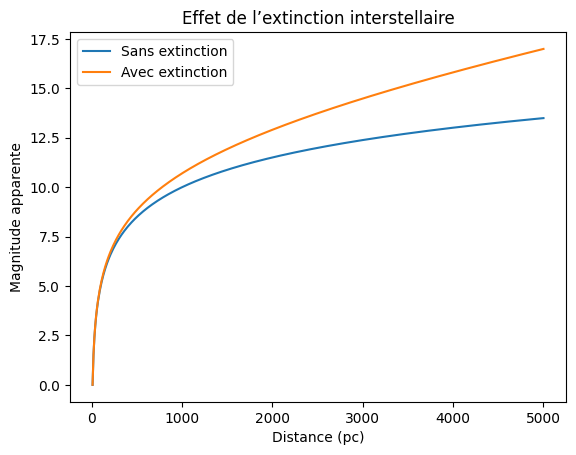

In [20]:
distances = np.linspace(10, 5000, 500)
mags_no_ext = M_star + module_distance(distances)
mags_with_ext = [apparent_magnitude_with_extinction(M_star, d) for d in distances]

plt.figure()
plt.plot(distances, mags_no_ext, label='Sans extinction')
plt.plot(distances, mags_with_ext, label='Avec extinction')
plt.xlabel('Distance (pc)')
plt.ylabel('Magnitude apparente')
plt.title('Effet de l’extinction interstellaire')
plt.legend()
plt.show()

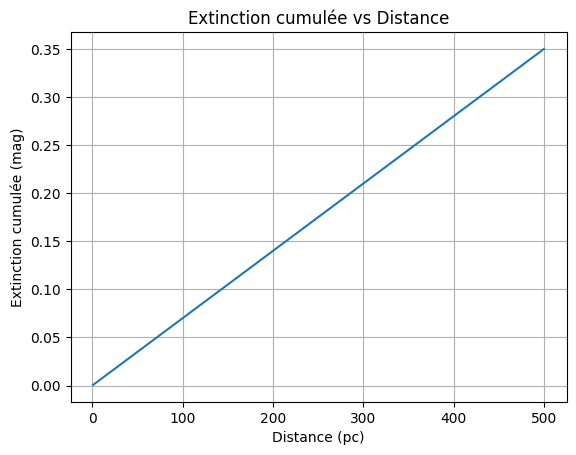

In [25]:
## Courbe de l’extinction cumulée en fonction de la distance

A_per_kpc = 0.7

extinction_cumulee = [A_per_kpc * (d/1000) for d in pc_range]

plt.figure()
plt.plot(pc_range, extinction_cumulee)
plt.xlabel('Distance (pc)')
plt.ylabel('Extinction cumulée (mag)')
plt.title('Extinction cumulée vs Distance')
plt.grid(True)
plt.show()

## 6) Questions de réflexion

- Pourquoi la magnitude apparente ne suit plus strictement 5 log d si l’extinction augmente ?
- Quelle conséquence pour l’observation de régions proches du plan galactique ?


## 7) Bonus : créer une fonction inverse pour estimer la distance à partir de (m, M, A_v)

In [22]:
def estimate_distance(m, M, A_per_kpc=0.7, guess_pc=1000):
    """Itère pour trouver d_pc qui satisfait m = M + 5 log d - 5 + extinction"""

    def func(d):
        d_kpc = d / 1000
        return M + 5 * np.log10(d) - 5 + A_per_kpc * d_kpc - m
    
    d_solution = fsolve(func, guess_pc)
    return d_solution[0]

# Test de la fonction inverse
m_obs = 15
M_known = 0

estimated_d = estimate_distance(m_obs, M_known)
print(f"Pour m = {m_obs} et M = {M_known}, distance estimée : {estimated_d:.1f} pc")

Pour m = 15 et M = 0, distance estimée : 3372.1 pc


# Données réelles

Téléchargez le fichier 'hygdata_v41.csv' (catalogue HYG) depuis https://astronexus.com/hyg  
Placez le dans votre dossier jupyter

In [58]:
data = pd.read_csv('hygdata_v41.csv')

## Afficher les colonnes disponibles
print("Colonnes disponibles dans le jeu de données :", '\n')
print(data.columns.tolist())

Colonnes disponibles dans le jeu de données : 

['id', 'hip', 'hd', 'hr', 'gl', 'bf', 'proper', 'ra', 'dec', 'dist', 'pmra', 'pmdec', 'rv', 'mag', 'absmag', 'spect', 'ci', 'x', 'y', 'z', 'vx', 'vy', 'vz', 'rarad', 'decrad', 'pmrarad', 'pmdecrad', 'bayer', 'flam', 'con', 'comp', 'comp_primary', 'base', 'lum', 'var', 'var_min', 'var_max']


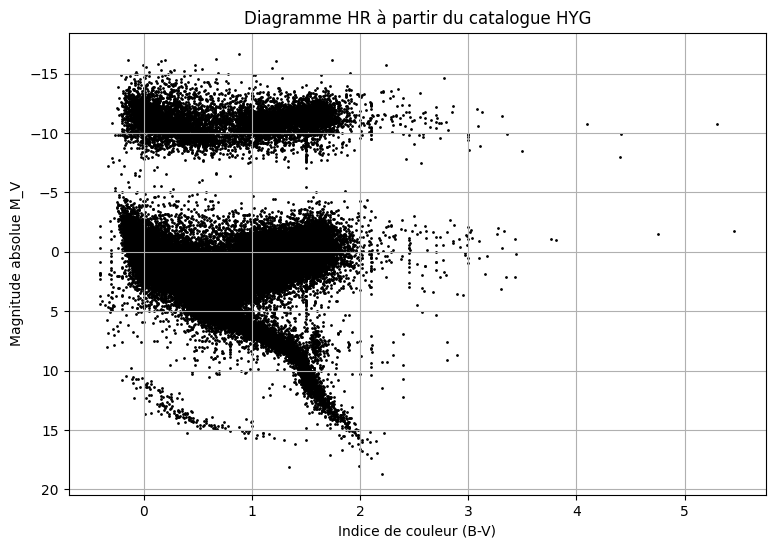

In [78]:
# Tracer un diagramme HR : Magnitude absolue vs indice de couleur (B-V)

plt.figure(figsize=(9, 6))
plt.scatter(data['ci'], data['absmag'], s=1, color='black') ## COMPLETER ICI
plt.gca().invert_yaxis()  # Pour que magnitude faible = plus haut
plt.xlabel('Indice de couleur (B-V)')
plt.ylabel('Magnitude absolue M_V')
plt.title('Diagramme HR à partir du catalogue HYG')
plt.grid(True)
plt.show()

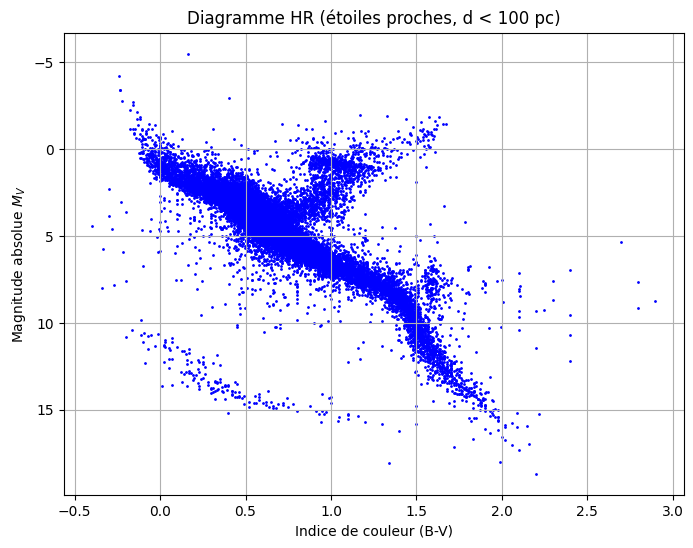

In [60]:
# Tracer le diagrammen en filtrant par distance pour montrer la séquence principale de la Voie lactée
nearby = data[data['dist'] < 100] ## COMPLETER ICI : sélectionner les étoiles dans un rayon de 100 parsecs

plt.figure(figsize=(8, 6))
plt.scatter(nearby['ci'], nearby['absmag'], s=1, color='blue') ## COMPLETER ICI
plt.gca().invert_yaxis()
plt.xlabel('Indice de couleur (B-V)')
plt.ylabel(r'Magnitude absolue $M_{V}$')
plt.title('Diagramme HR (étoiles proches, d < 100 pc)')
plt.grid(True)
plt.show()

- Essayez de changer le rayon de distance et observez la différence.
- Ajoutez une couleur selon la magnitude apparente.
- Filtrez les géantes et supergéantes (absmag < -2) pour les surligner.

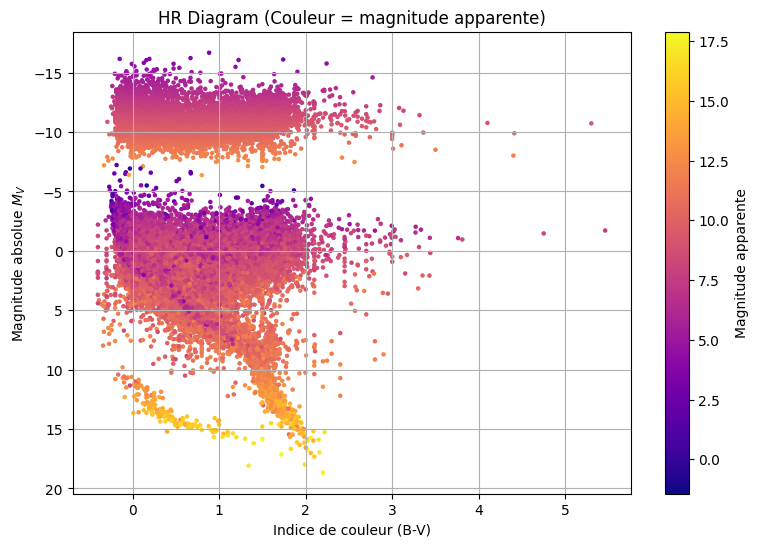

In [ ]:
# HR Diagramme avec couleur dépendant de la magnitude apparente
data_mag = data[data['mag']>-5]

plt.figure(figsize=(9, 6))
sc = plt.scatter(data_mag['ci'], data_mag['absmag'], s=5, c=data_mag['mag'], cmap='plasma') ## COMPLETER ICI
plt.gca().invert_yaxis()
plt.xlabel('Indice de couleur (B-V)')
plt.ylabel(r'Magnitude absolue $M_{V}$')
plt.title('HR Diagram (Couleur = magnitude apparente)')
cbar = plt.colorbar(sc)
cbar.set_label('Magnitude apparente')
plt.grid(True)
plt.show()

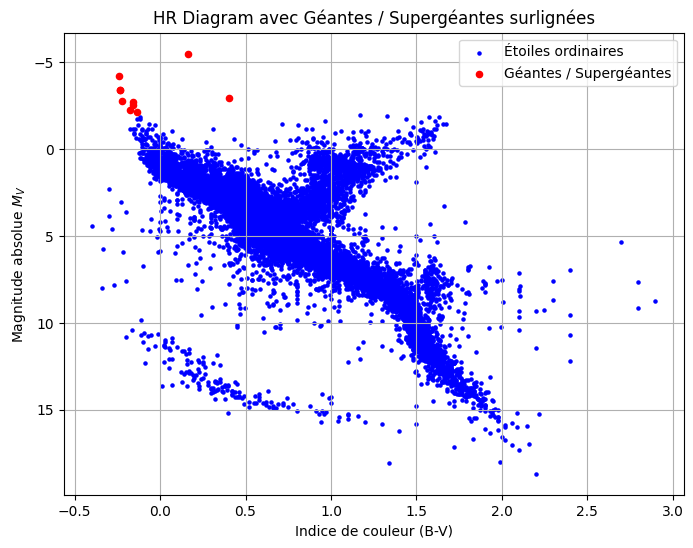

In [72]:
# HR Diagramme en surlignant les géantes/supergéantes (M_V < -2)
plt.figure(figsize=(8, 6))
plt.scatter(nearby['ci'], nearby['absmag'], s=5, color='blue', label='Étoiles ordinaires')
# Filtre géantes et supergéantes
giants = nearby[nearby['absmag'] < -2]
plt.scatter(giants['ci'], giants['absmag'], s=20, color='red', label='Géantes / Supergéantes')

plt.gca().invert_yaxis()
plt.xlabel('Indice de couleur (B-V)')
plt.ylabel(r'Magnitude absolue $M_{V}$')
plt.title('HR Diagram avec Géantes / Supergéantes surlignées')
plt.legend()
plt.grid(True)
plt.show()


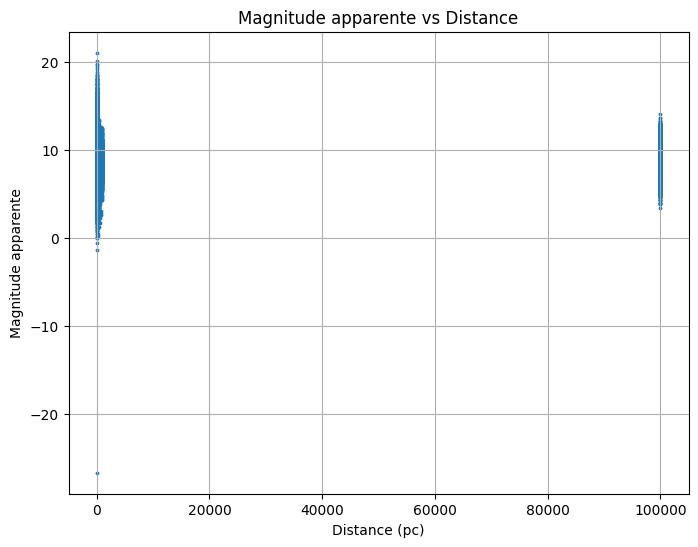

In [73]:
plt.figure(figsize=(8, 6))
plt.scatter(data['dist'], data['mag'], s=3, alpha=1)
plt.xlabel('Distance (pc)')
plt.ylabel('Magnitude apparente')
plt.title('Magnitude apparente vs Distance')
plt.grid(True)
plt.show()

Expliquer la tendance observée et la limite de détection.

À courte distance (zone dense à gauche)  
- On voit une large dispersion des magnitudes apparentes : certaines étoiles sont très brillantes (mag apparente faible ou négative) car elles sont proches et/ou intrinsèquement très lumineuses, d’autres sont plus faibles.    
- Cette dispersion reflète la diversité des luminosités absolues des étoiles locales.

À grande distance (pic vers ~100,000 pc)  
- On observe un amas de points avec magnitude apparente relativement élevée (autour de 10–15) mais aucune étoile très brillante ni très faible.  
- Cela indique qu’à grande distance, seules les étoiles intrinsèquement très lumineuses sont détectables, car les plus faibles tombent sous la limite de sensibilité de l’instrument.

La magnitude apparente augmente avec la distance car le flux reçu décroît avec  1/d^2    
- Pour des étoiles de luminosité donnée, cela fixe une magnitude limite au-delà de laquelle l’instrument ne détecte plus rien.
- Sur ton graphique, on voit bien un « plancher » : aucune étoile détectée au-delà d’une certaine magnitude apparente.

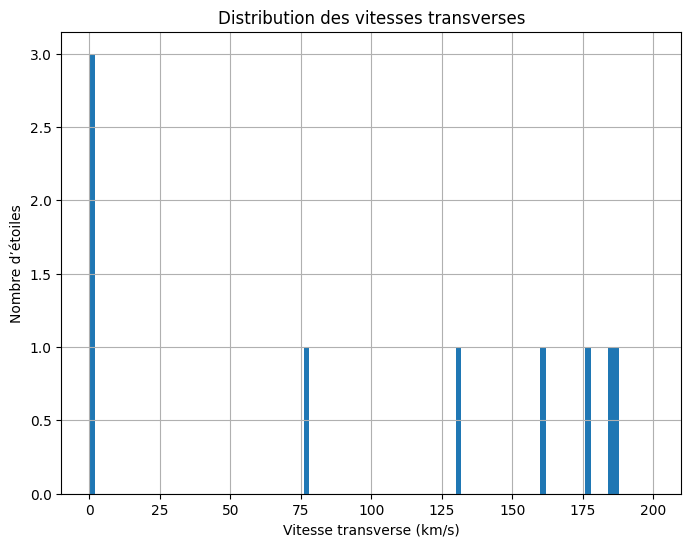

In [74]:
# Mouvement propre : calculer vitesse transverse approximative (µ * d)
data['pm'] = np.sqrt(data['pmra']**2 + data['pmdec']**2)  # mas/yr
data['v_transverse'] = 4.74 * data['pm'] * data['dist']  # km/s

plt.figure(figsize=(8, 6))
plt.hist(data['v_transverse'].dropna(), bins=100, range=(0, 200))
plt.xlabel('Vitesse transverse (km/s)')
plt.ylabel('Nombre d’étoiles')
plt.title('Distribution des vitesses transverses')
plt.grid(True)
plt.show()

Que dire des étoiles à vitesse transverse > 100 km/s ? Sont-elles typiques du disque ?  

Ce qu’on observe  
- La plupart des étoiles ont une vitesse transverse faible (pic vers 0–25 km/s).
- Un petit nombre d’étoiles ont des vitesses transverses supérieures à 100 km/s, visibles dans les barres vers 150–200 km/s.

Que dire de ces vitesses ?  
- Dans le disque galactique, la majorité des étoiles suivent un mouvement de rotation différentielle autour du centre galactique, avec des vitesses relatives modérées : typiquement quelques dizaines de km/s par rapport au Soleil.  
- Une vitesse transverse > 100 km/s est élevée pour une étoile du disque mince et peut indiquer :  
  - Une étoile du halo galactique ou du disque épais, qui a une cinématique différente, moins liée à la rotation galactique.  
  - Parfois une étoile à forte vitesse propre car elle est proche, ou une étoile échappée (runaway star).     

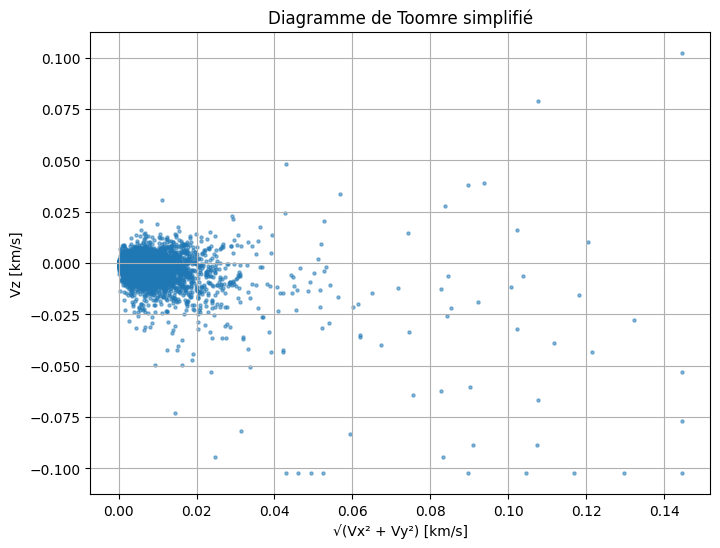

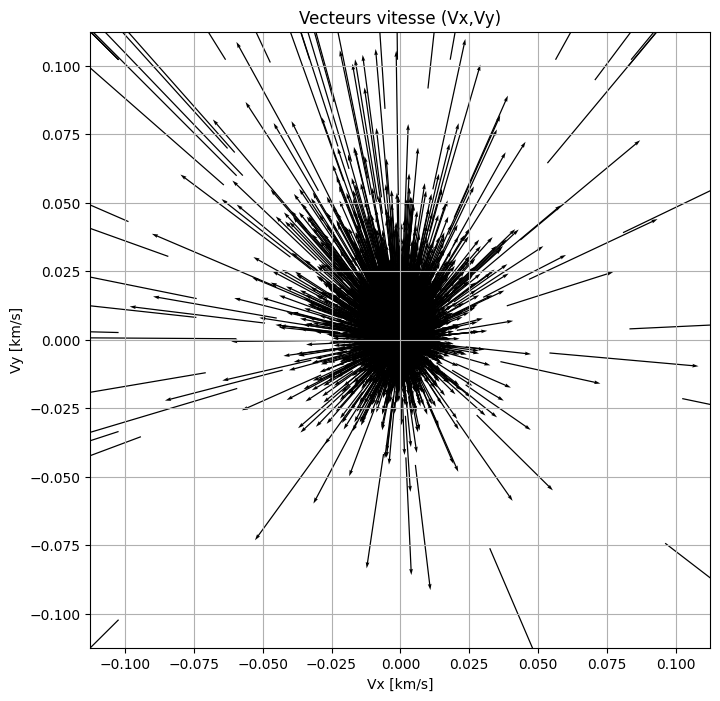

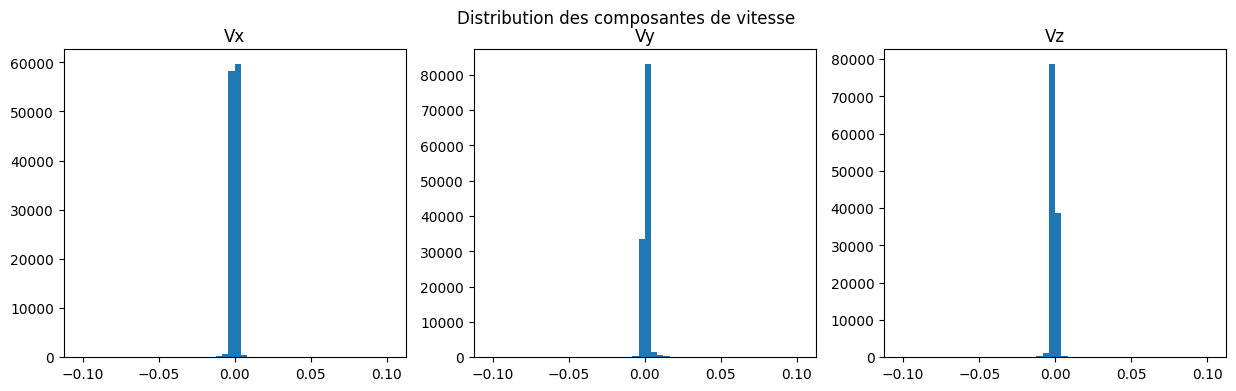

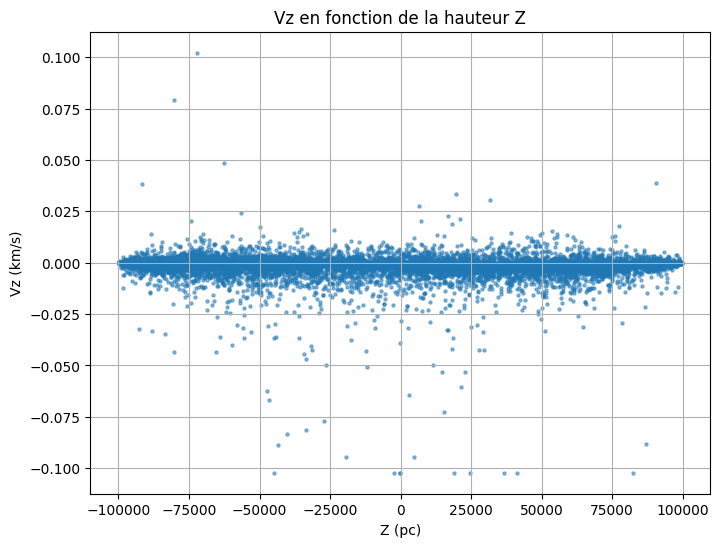

In [90]:
data['v_total'] = np.sqrt(data['vx']**2 + data['vy']**2 + data['vz']**2)

Ux = data['vx']
Uy = data['vy']
Uz = data['vz']

## Diagramme de Toomre

V_plane = np.sqrt(Ux**2 + Uy**2)

plt.figure(figsize=(8,6))
plt.scatter(V_plane, Uz, s=5, alpha=0.5)
plt.xlabel('√(Vx² + Vy²) [km/s]')
plt.ylabel('Vz [km/s]')
plt.title('Diagramme de Toomre simplifié')
plt.grid(True)
plt.show()

## Représentation vectorielle (quiver plot)
plt.figure(figsize=(8,8))
plt.quiver(data['vx'], data['vy'],
           data['vx'], data['vy'],
           angles='xy', scale_units='xy', scale=1, width=0.002)
plt.xlabel('Vx [km/s]')
plt.ylabel('Vy [km/s]')
plt.title('Vecteurs vitesse (Vx,Vy)')
plt.grid(True)
plt.show()

## Histogrammes par composante
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].hist(data['vx'], bins=50)
axes[0].set_title('Vx')

axes[1].hist(data['vy'], bins=50)
axes[1].set_title('Vy')

axes[2].hist(data['vz'], bins=50)
axes[2].set_title('Vz')

plt.suptitle('Distribution des composantes de vitesse')
plt.show()

## Relation vitesse-altitude (Vz vs Z)
plt.figure(figsize=(8,6))
plt.scatter(data['z'], data['vz'], s=5, alpha=0.5)
plt.xlabel('Z (pc)')
plt.ylabel('Vz (km/s)')
plt.title('Vz en fonction de la hauteur Z')
plt.grid(True)
plt.show()

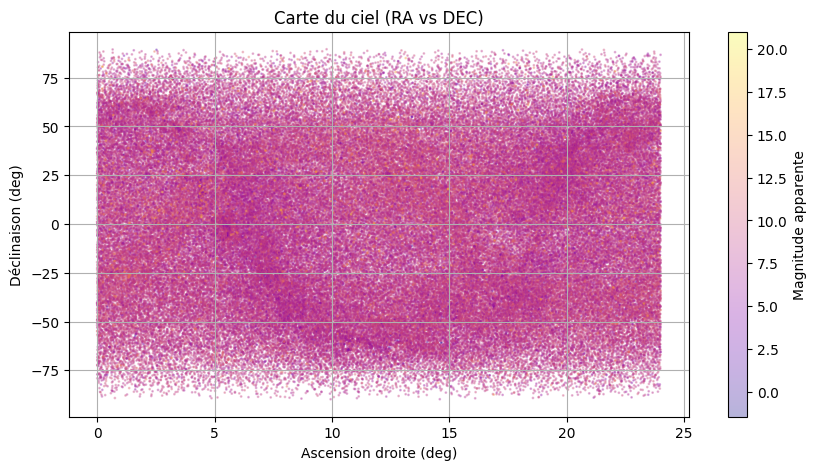

In [94]:
# Tracer la distribution RA vs DEC
plt.figure(figsize=(10, 5))
sc = plt.scatter(data_mag['ra'], data_mag['dec'], c=data_mag['mag'], s=1, alpha=0.3, cmap='plasma') ## COMPLETER ICI
plt.colorbar(sc, label='Magnitude apparente')
plt.xlabel('Ascension droite (deg)')
plt.ylabel('Déclinaison (deg)')
plt.title('Carte du ciel (RA vs DEC)')
plt.grid(True)
plt.show()

- Identifier la bande de la Voie Lactée et commenter la distribution.
- Pourquoi la couleur « magnitude apparente » ressort peu en carte RA/DEC, alors qu'elle est très visible dans le diagramme HR ?

Réponses
- La bande de la Voie Lactée se manifeste par une concentration d’étoiles formant une bande inclinée sur la carte RA/DEC, indiquant la forte densité du disque galactique par rapport aux régions plus diffuses à haute latitude
- Carte RA/DEC : montre la position angulaire → la magnitude apparente y est mélangée car il n’y a pas d’information de profondeur.  
Diagramme HR : organise les étoiles par propriétés physiques → la magnitude apparente suit la hiérarchie physique (géantes vs naines), donc la couleur est plus structurée et informative.

In [76]:
# Par type spectral : extraire type O/B/A/F/G/K/M
data['spect_type'] = data['spect'].astype(str).str[0]

counts = data['spect_type'].value_counts()
print("Distribution des types spectraux :")
print(counts)


Distribution des types spectraux :
spect_type
K    32094
F    25602
G    22784
A    18699
B    10416
M     5243
n     3048
m      591
O      265
D      174
C      162
d      108
k       90
R       89
s       76
W       74
N       61
S       26
g       14
p        5
f        3
(        1
a        1
Name: count, dtype: int64


Quelle classe domine localement ? Comparer à l’indice de couleur.  

D’après la distribution affichée, la classe spectrale K est de loin la plus nombreuse localement (32 094 étoiles), suivie par F, G et A. La classe K regroupe les étoiles de type tardif, donc des étoiles plus froides, plutôt rouges-orangées, et typiquement de faible masse.  

Ceci est cohérent avec l’indice de couleur (B–V) : les étoiles de type K ont un indice B–V plus grand que les types O/B/A, donc elles apparaissent plus rouges. Localement, les étoiles de faible masse sont les plus abondantes car elles vivent très longtemps, tandis que les étoiles massives (types O, B) sont rares et de courte durée de vie.  

Ainsi, la population locale est dominée par des étoiles froides, rouges à orangées, ce que confirme la prépondérance des types K.  

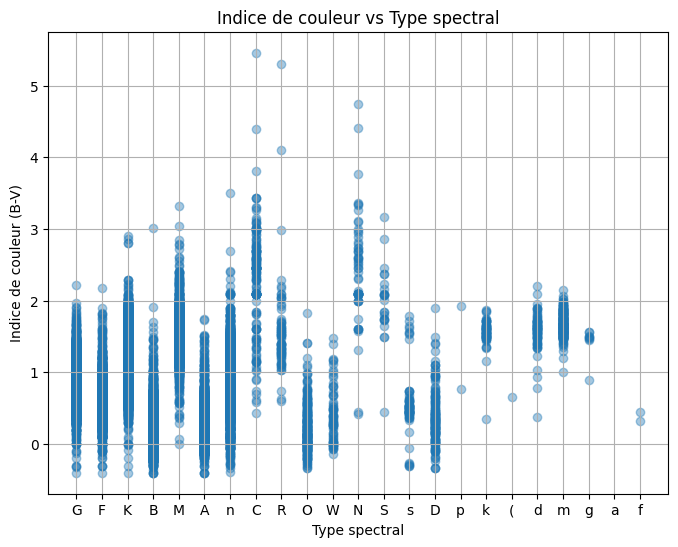

In [ ]:
# Tracer une figure reliant l'indice de couleur et le type spectral

plt.figure(figsize=(8, 6))
plt.scatter(data['spect_type'], data['ci'], alpha=0.4) ## COMPLETER ICI
plt.xlabel('Type spectral')
plt.ylabel('Indice de couleur (B-V)')
plt.title('Indice de couleur vs Type spectral')
plt.grid(True)
plt.show()

Vérifier la cohérence entre (B-V) et type spectral.

# Mouvement des lunes galiléennes

Ahmed Ammar  
Faculté des Sciences, Université de Tunis El Manar et Société Astronomique de Tunisie  
2019  
© 2019, Ahmed Ammar. Released under CC Attribution 4.0 license

In [26]:
import ephem as ep
# NOUS CRÉONS LES OBJETS
Io = ep.Io()
Eu = ep.Europa()
Ga = ep.Ganymede()
Ca = ep.Callisto()
# Créons des tableaux vide pour
# SAUVEGARDER LES COORDONNÉES
y = []
xIo = []
xEu = []
xGa = []
xCa = []

In [28]:
# pas de temps - heure
dt = ep.hour
# temps initial
ts = ep.now()
# heure actuelle
tm = ts
N=2*24
for i in range(N):
    # nous calculons des valeurs y
    y.append((tm - ts)*24.0)
    # nous calculons des valeurs x
    Io.compute(tm)
    Eu.compute(tm)
    Ga.compute(tm)
    Ca.compute(tm)
    # nous ajoutons des calculs aux tableaux
    xIo.append(Io.x)
    xEu.append(Eu.x)
    xGa.append(Ga.x)
    xCa.append(Ca.x)
    # on augmente le temps d'une heure
    tm += dt

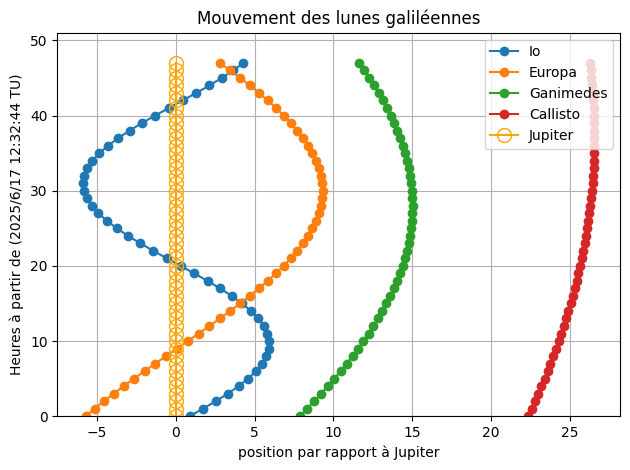

In [34]:
from pylab import *

fig1 = plt.figure()
plot(xIo, y, marker ="o", label ="Io")
plot(xEu, y, marker ="o", label ="Europa")
plot(xGa, y, marker ="o", label ="Ganimedes")
plot(xCa, y, marker ="o", label ="Callisto")
plot(zeros(len(y)), y, marker="o", markersize=10, label="Jupiter", color="orange", fillstyle='none')
xlabel(u"position par rapport à Jupiter")
ylabel("Heures à partir de (%s TU)"% ts)
ylim(0,N+3)
title(u"Mouvement des lunes galiléennes")
grid()
legend(loc =1)
tight_layout()

show()